# Generating Simulations from Observed Asset Prices
This notebook provides an example for generating multiple correlated asset price simulations with SimCAP using ten years of daily historical price data for the assets being simulated. For each of the simulations, the following evaluations are provided to assess the realism of the simulations:

* Cumulative Simple Returns
* Cumulative Log Returns
* Correlation Coefficients of 1-Period Log Returns
* Distribution of 1-Period Log Returns
* Comparative Statistics
* Autocorrelation of Log Returns
* Autocorrelation of Squared Log Returns
* Correlation Between Returns and Volatility

In [1]:
from simcap import SimCAP
from simcap.datasets import load_example_asset_price_history
from example_helpers import (
    plot_path_comparison,
    plot_corr_comparison,
    plot_distribution_comparisons,
    plot_autocorr_comparisons,
    return_to_volatility_correlation,
    compare_statistics,
)
import warnings
warnings.filterwarnings("ignore")

## Observed Data
Daily closing prices (adjusted for dividends and splits) for the following Exchange Traded Funds (ETFs) over a 10-year period:

* **SPY** &mdash; SPDR S&P 500 ETF Trust
* **VO** &mdash; Vanguard Mid-Cap Index Fund ETF
* **IWM** &mdash; iShares Russell 2000 ETF
* **EFA** &mdash; iShares MSCI EAFE ETF
* **VWO** &mdash; Vanguard Emerging Markets Stock Index Fund ETF
* **AGG** &mdash; iShares Core US Aggregate Bond ETF
* **IBND** &mdash; SPDR Bloomberg International Corporate Bond ETF
* **VNQ** &mdash; Vanguard Real Estate Index Fund ETF


In [2]:
df = load_example_asset_price_history()

In [3]:
df.head()

SPY         VO        IWM        EFA        VWO        AGG  \
0  106.796135  64.467972  66.440186  37.222393  30.877451  86.689796   
1  107.976936  65.523827  67.623489  37.845367  31.636541  86.580055   
2  108.546638  65.999840  68.041145  38.312595  31.935581  86.438980   
3  108.951248  65.800781  68.084663  38.512833  31.973923  86.219429   
4  108.670502  65.913300  67.997643  38.661160  32.142605  86.148888   

        IBND        VNQ  
0  29.319653  39.604931  
1  29.563057  39.880756  
2  29.675386  40.035488  
3  29.675386  40.284424  
4  29.946869  40.479504

## Normalization
We'll divide the dataset by the first row to more easily compare the cumulative returns of each asset over time.

In [4]:
norm = df / df.iloc[0, :]

In [5]:
norm.head()

SPY        VO       IWM       EFA       VWO       AGG      IBND  \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  1.011057  1.016378  1.017810  1.016737  1.024584  0.998734  1.008302   
2  1.016391  1.023762  1.024096  1.029289  1.034269  0.997107  1.012133   
3  1.020180  1.020674  1.024751  1.034668  1.035510  0.994574  1.012133   
4  1.017551  1.022419  1.023441  1.038653  1.040973  0.993760  1.021392   

        VNQ  
0  1.000000  
1  1.006964  
2  1.010871  
3  1.017157  
4  1.022082

## Generating Simulations

1. Initialize a `SimCAP`instance with the observed data
2. Call the `generate_simulations` method

For this example, we have chosen parameters to:

* generate five simulations (`n_sims=5`)
* set the beginning values of each asset in each simulation to 1 (`begin_values="norm"`)
* use the `fit_pipeline_params` dictionary we created as a grid search space to find well-performing parameters for our underlying Hidden Markov Model
* capped the grid search to 60 candidates chosen at random (`hmm_search_n_iter=60`)
* set the number of random initializations per candidate to 10 (`hmm_search_n_fits_per_iter=10`)
* output the simulations as a list of pandas dataframes (`output_as_dfs=True`)

In [6]:
model = SimCAP(df, suppress_warnings=True)

fit_pipeline_params = dict(
    n_states = [3, 4, 5, 6, 7, 8, 9],
    cov_window_size = [13, 21, 34, 55, 89, 144],
    pca_n_components = [0.8, 0.85, 0.9, 0.95, None],
    scale_before_pca = [True, False],
    scale_after_pca = [True, False],
)

sims = model.generate_simulations(
    n_sims=5, 
    begin_values="norm",
    hmm_search_params=fit_pipeline_params,
    hmm_search_n_iter=60, 
    hmm_search_n_fits_per_iter=10, 
    output_as_dfs=True,
    verbose=True,
)

generating simulations: 100%|████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.55it/s]


## Simulation 1
---

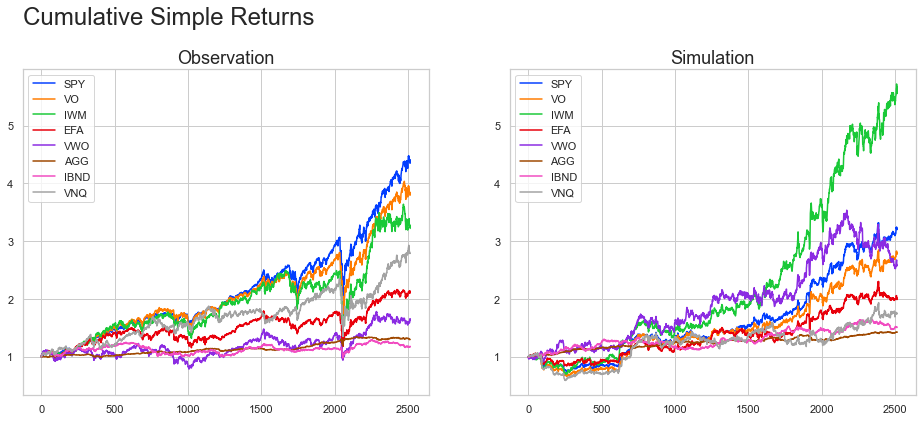

In [7]:
plot_path_comparison(norm, sims[0])

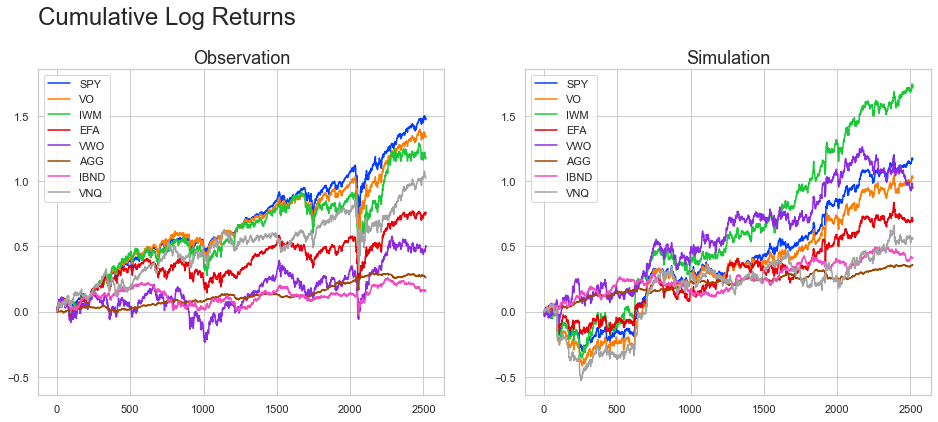

In [8]:
plot_path_comparison(norm, sims[0], log=True)

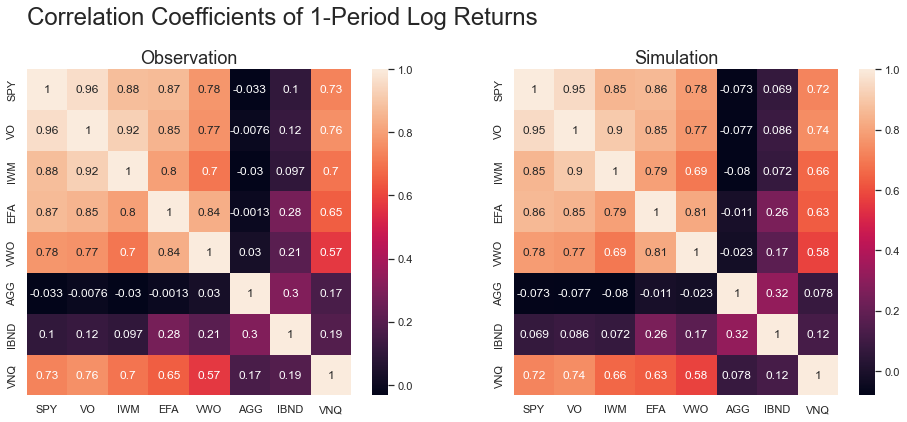

In [9]:
plot_corr_comparison(norm, sims[0])

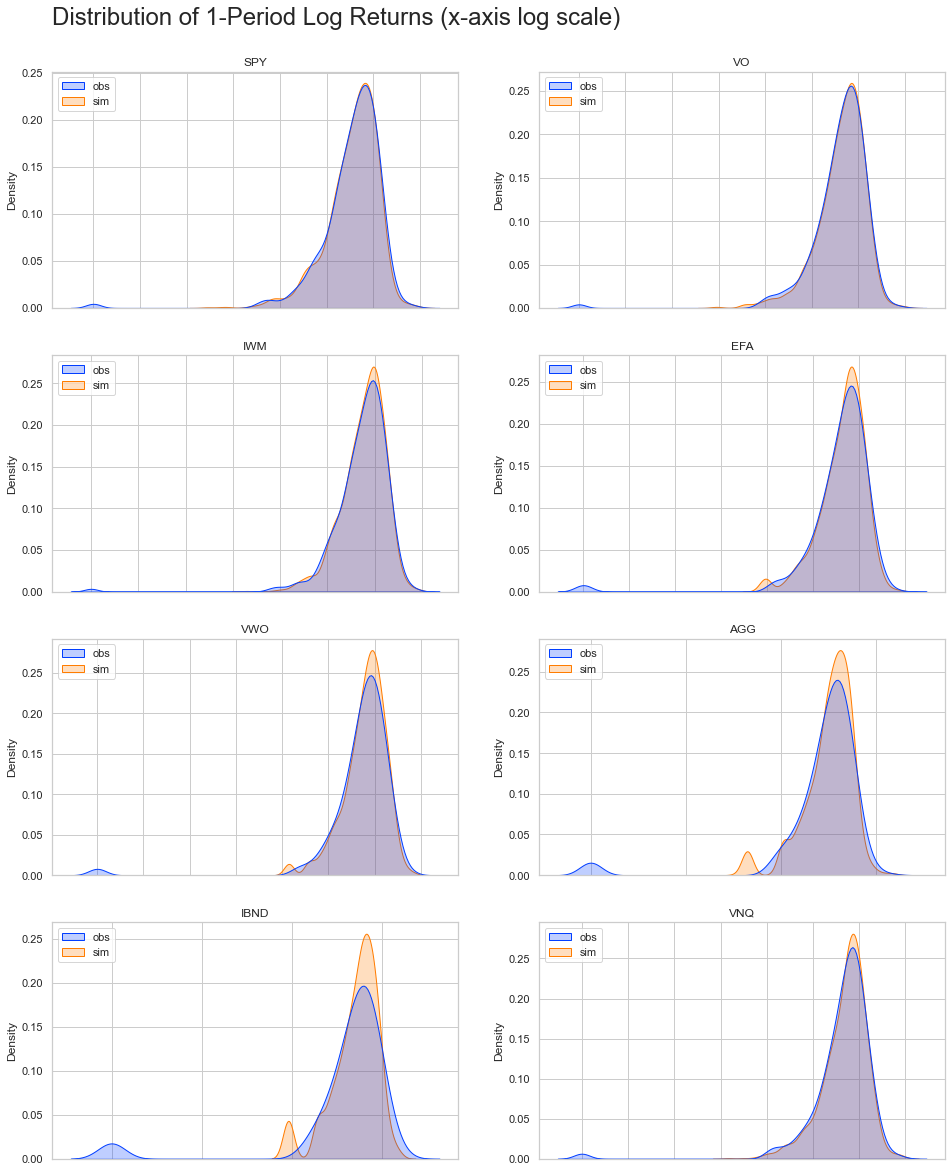

In [10]:
plot_distribution_comparisons(norm, sims[0])

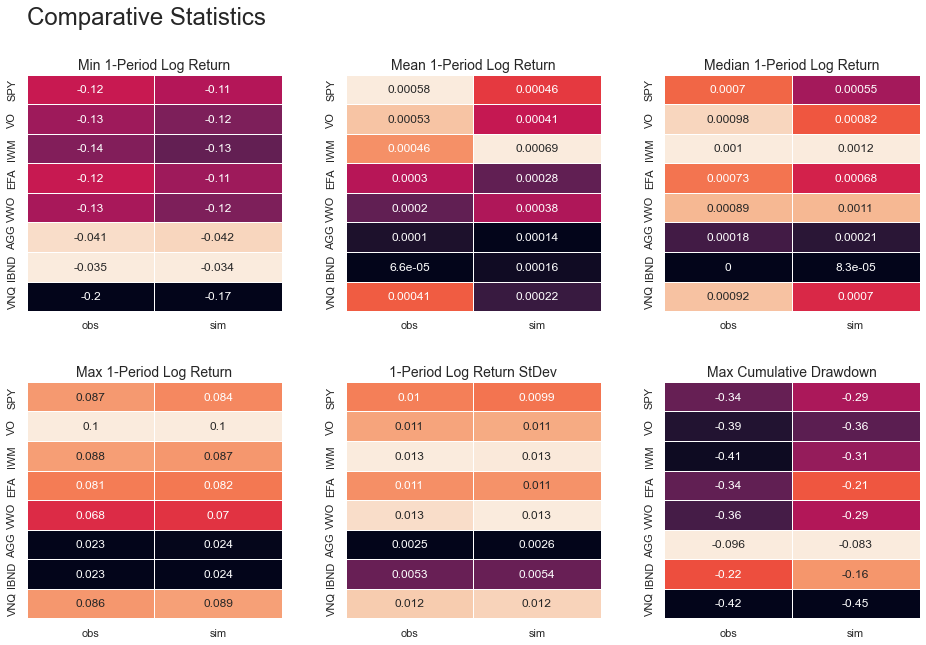

In [11]:
compare_statistics(norm, sims[0])

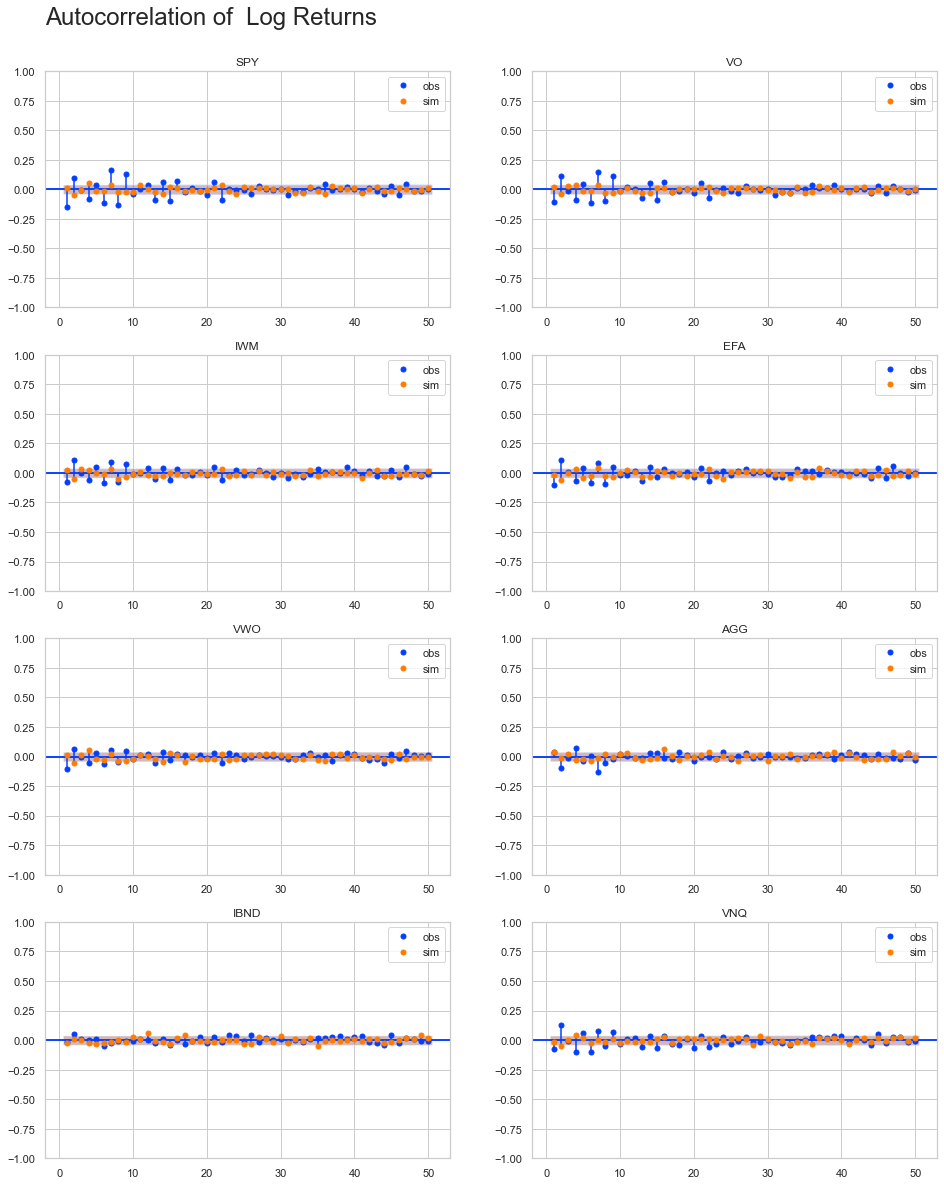

In [12]:
plot_autocorr_comparisons(norm, sims[0])

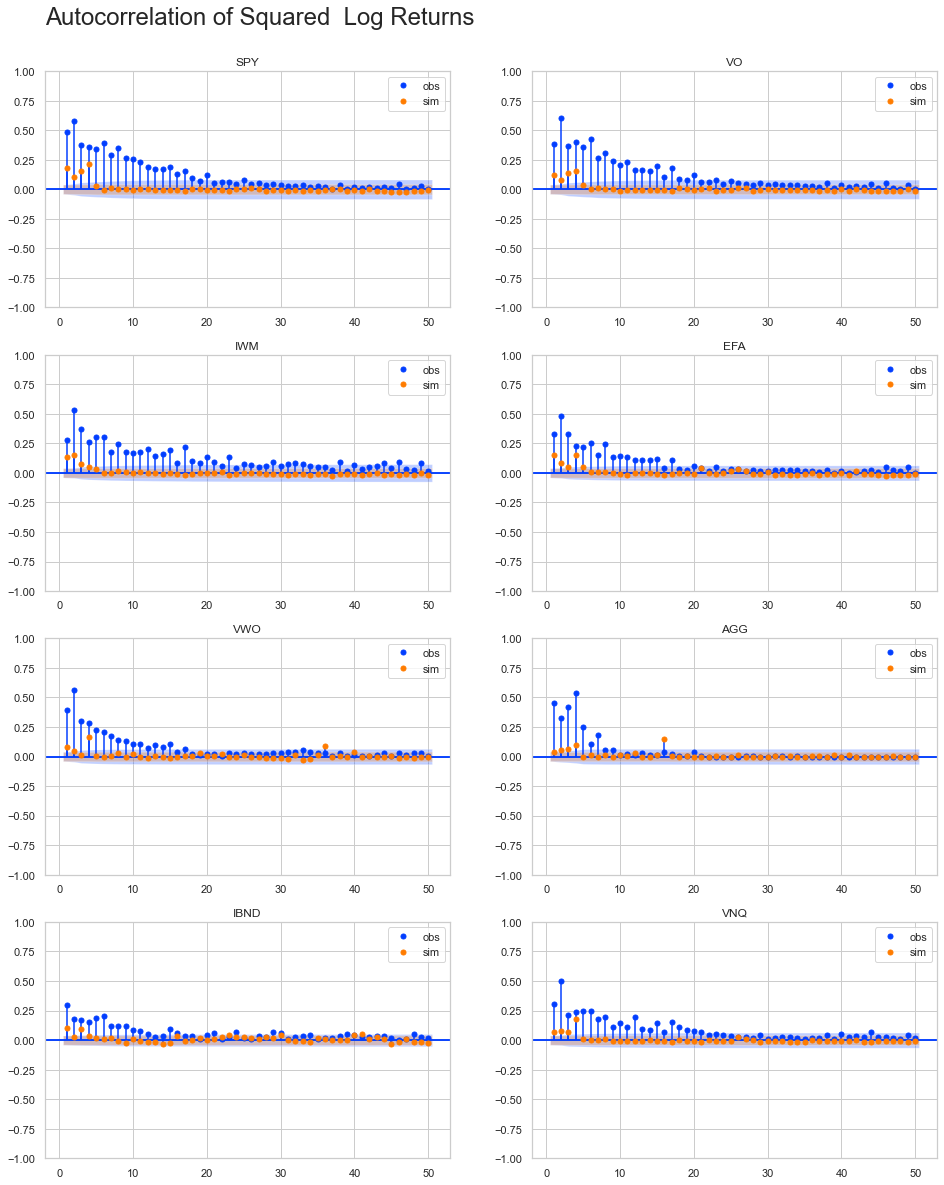

In [13]:
plot_autocorr_comparisons(norm, sims[0], square=True)

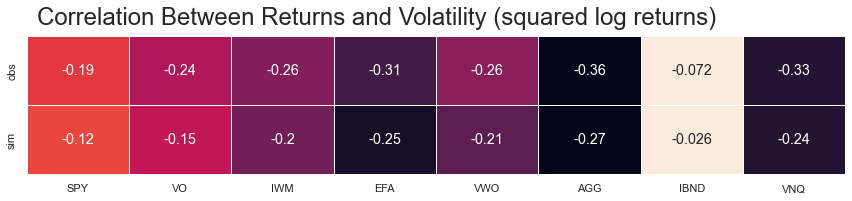

In [14]:
return_to_volatility_correlation(norm, sims[0])

---
## Simulation 2
---

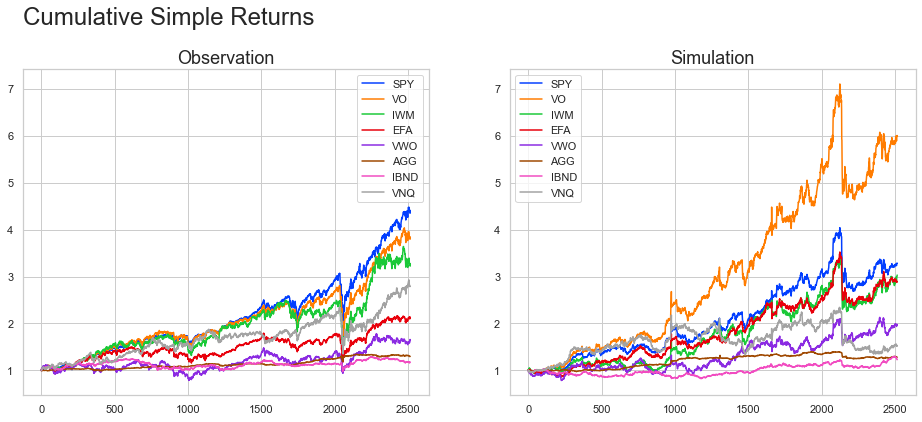

In [15]:
plot_path_comparison(norm, sims[1])

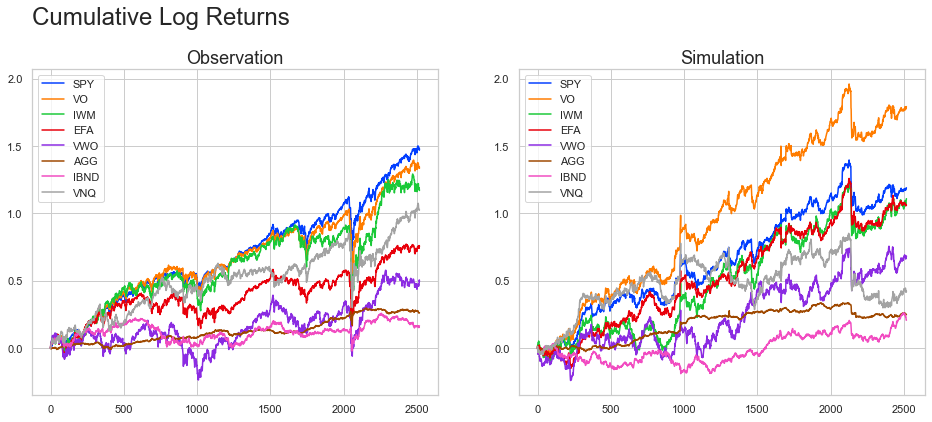

In [16]:
plot_path_comparison(norm, sims[1], log=True)

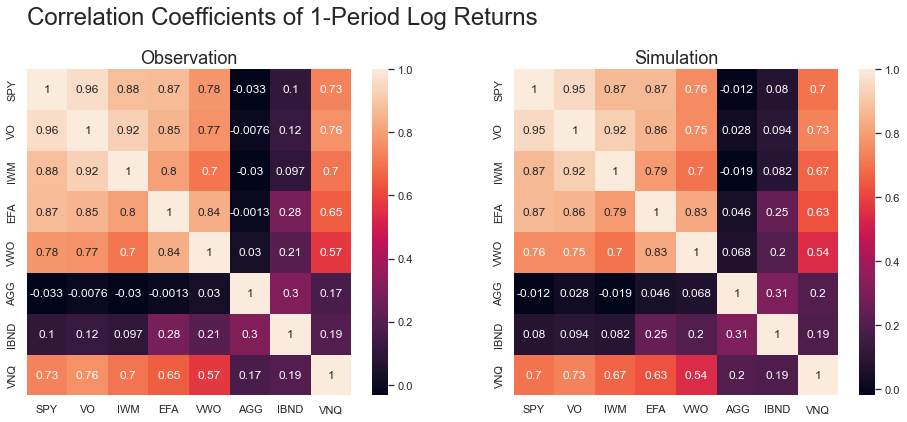

In [17]:
plot_corr_comparison(norm, sims[1])

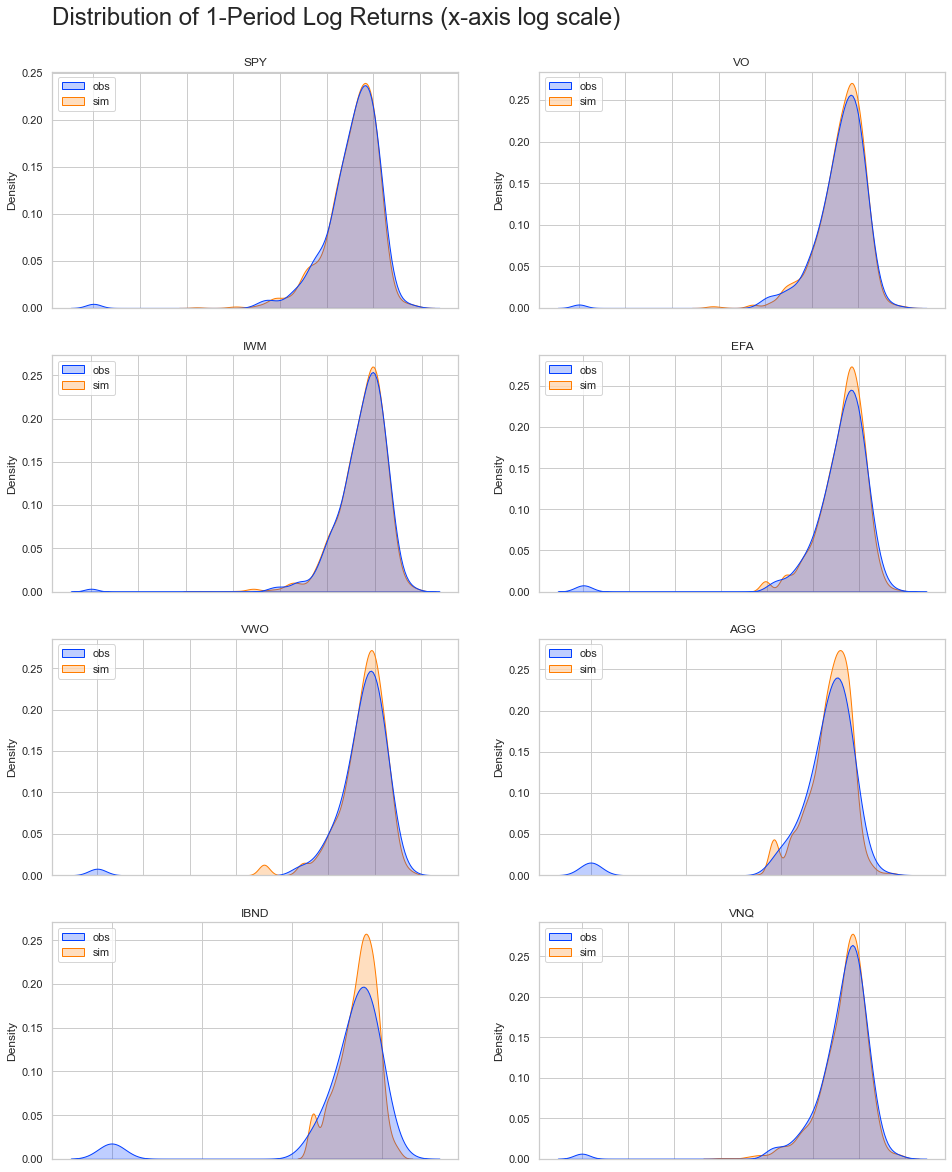

In [18]:
plot_distribution_comparisons(norm, sims[1])

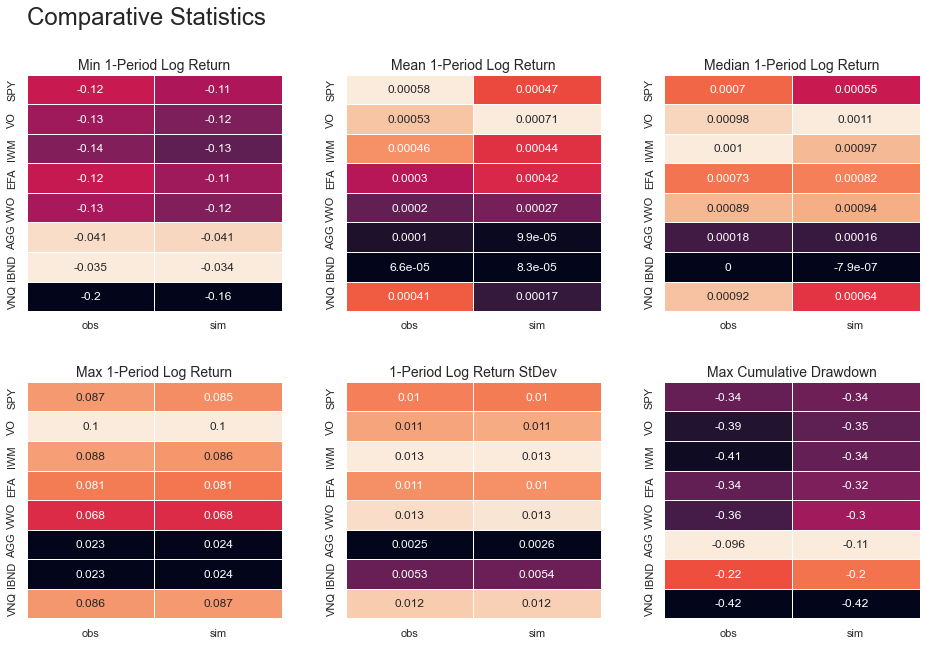

In [19]:
compare_statistics(norm, sims[1])

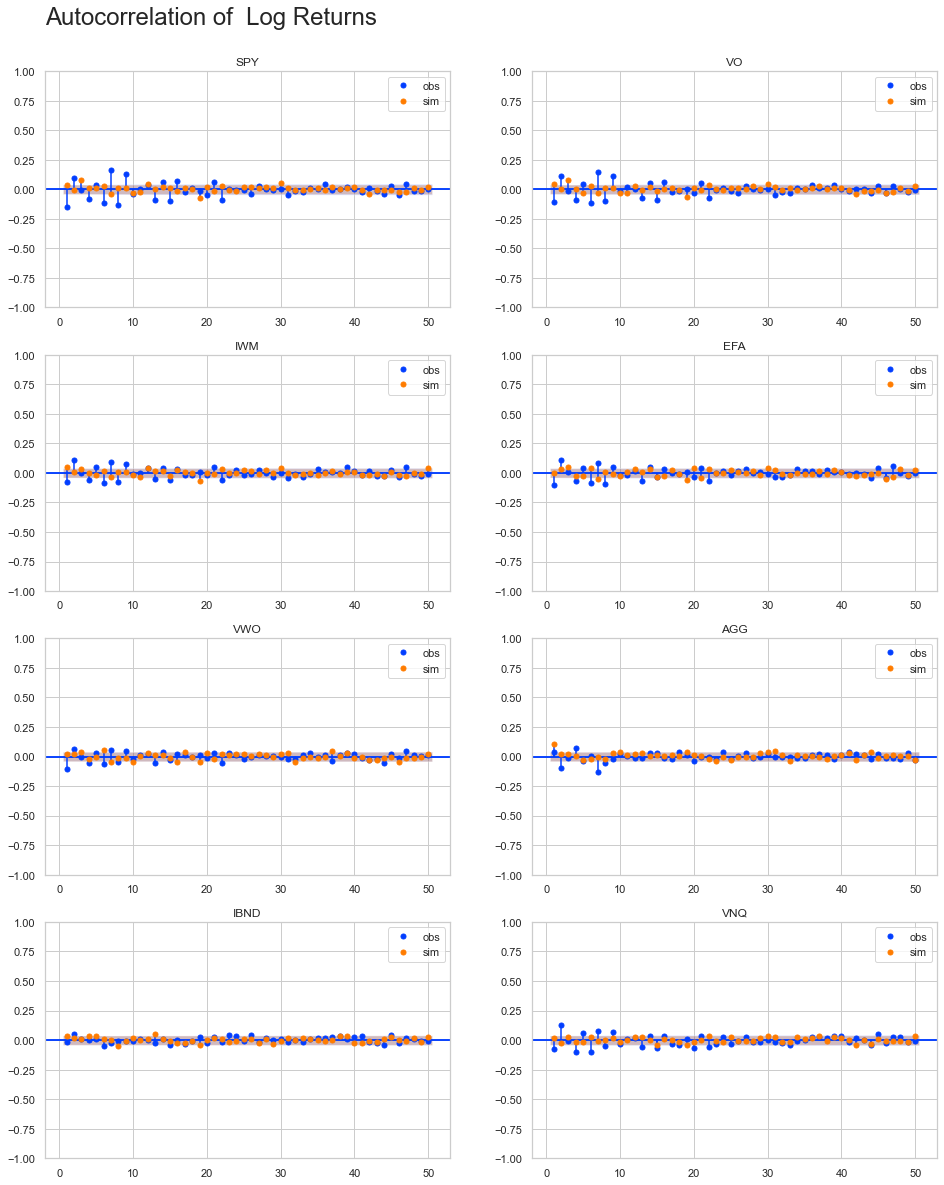

In [20]:
plot_autocorr_comparisons(norm, sims[1])

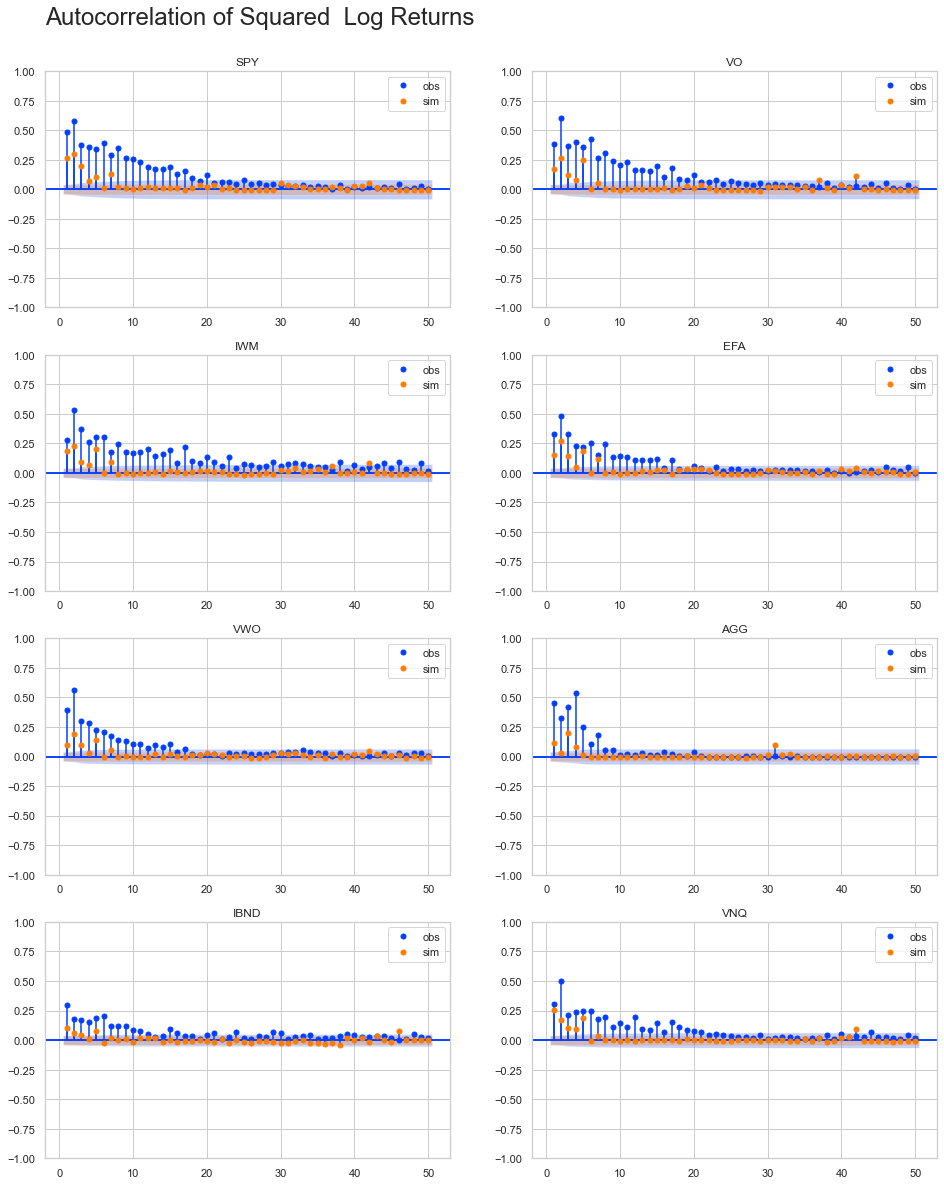

In [21]:
plot_autocorr_comparisons(norm, sims[1], square=True)

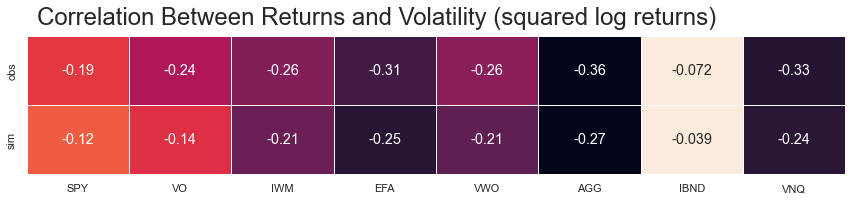

In [22]:
return_to_volatility_correlation(norm, sims[1])

---
## Simulation 3
---

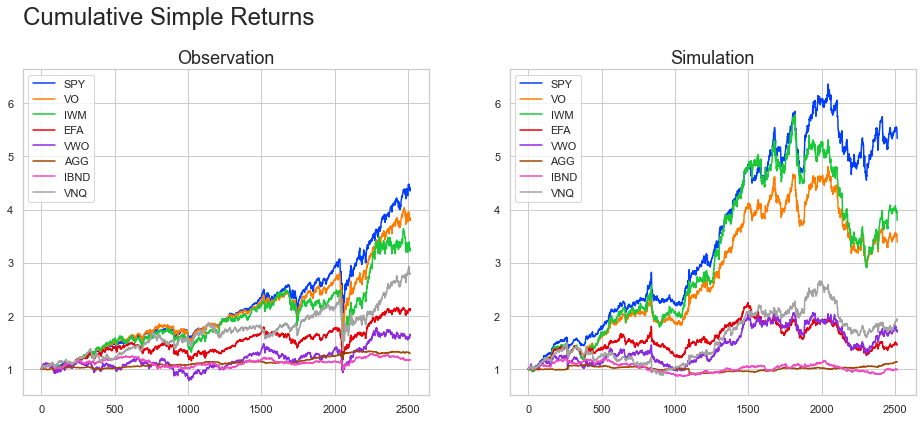

In [23]:
plot_path_comparison(norm, sims[2])

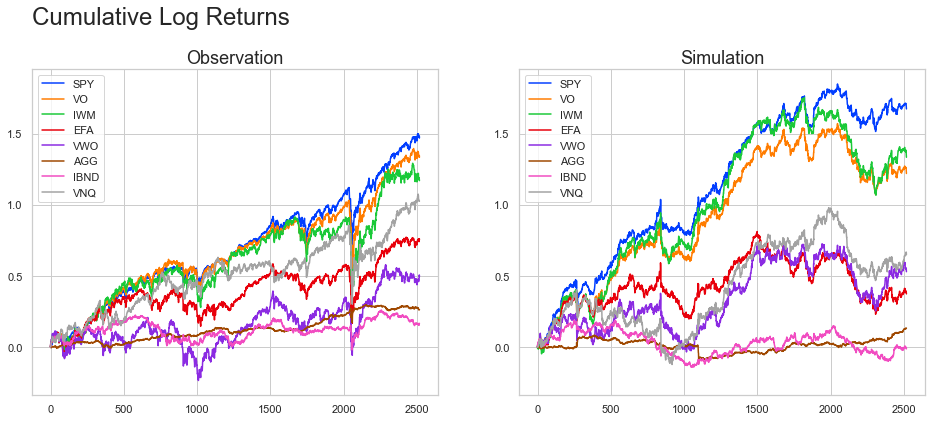

In [24]:
plot_path_comparison(norm, sims[2], log=True)

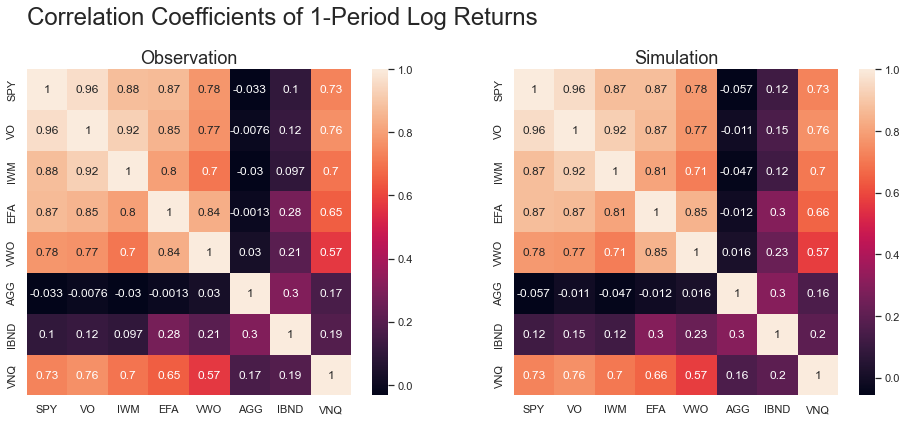

In [25]:
plot_corr_comparison(norm, sims[2])

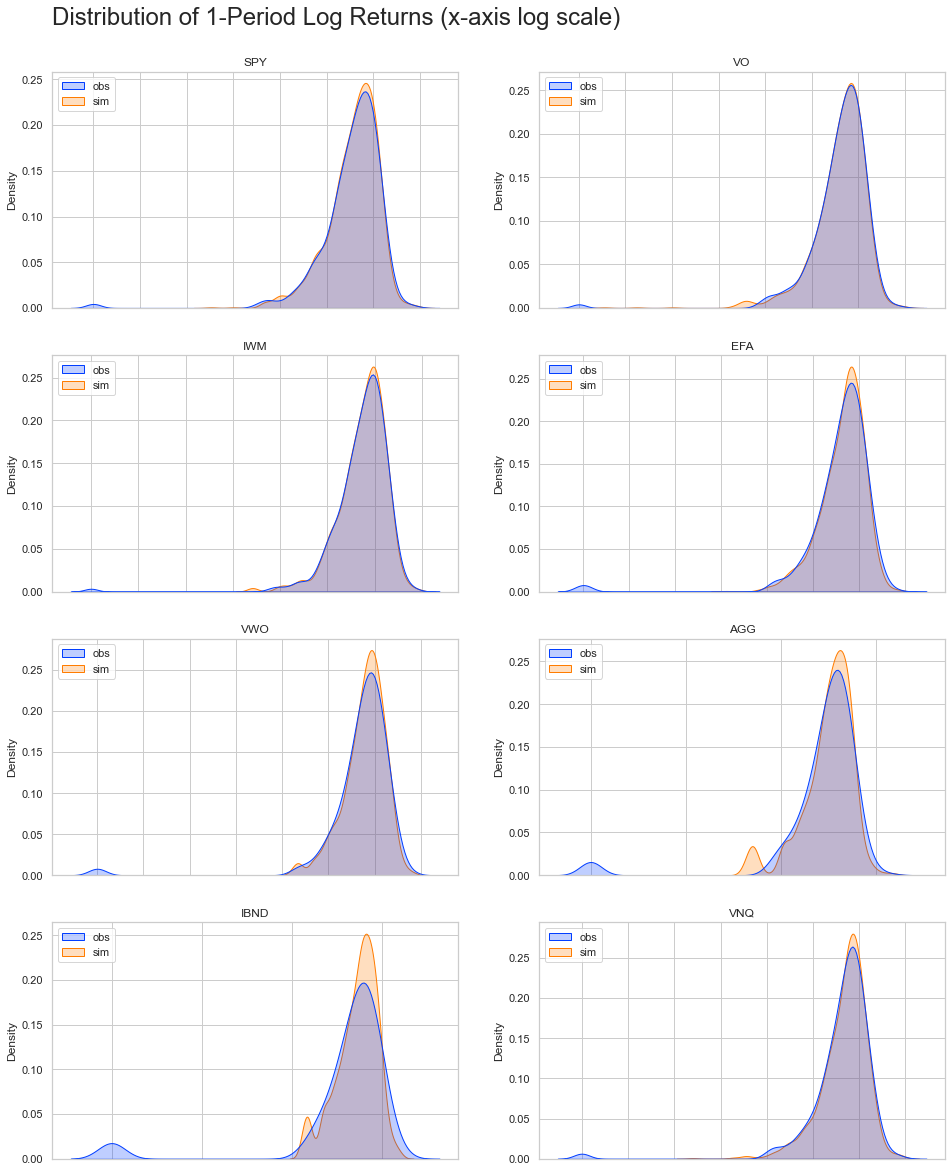

In [26]:
plot_distribution_comparisons(norm, sims[2])

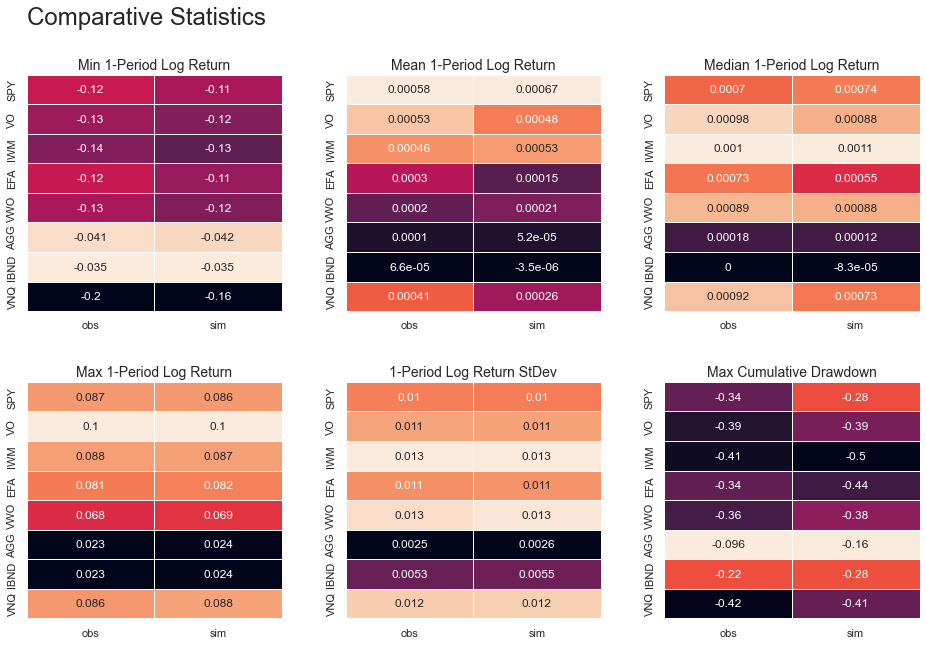

In [27]:
compare_statistics(norm, sims[2])

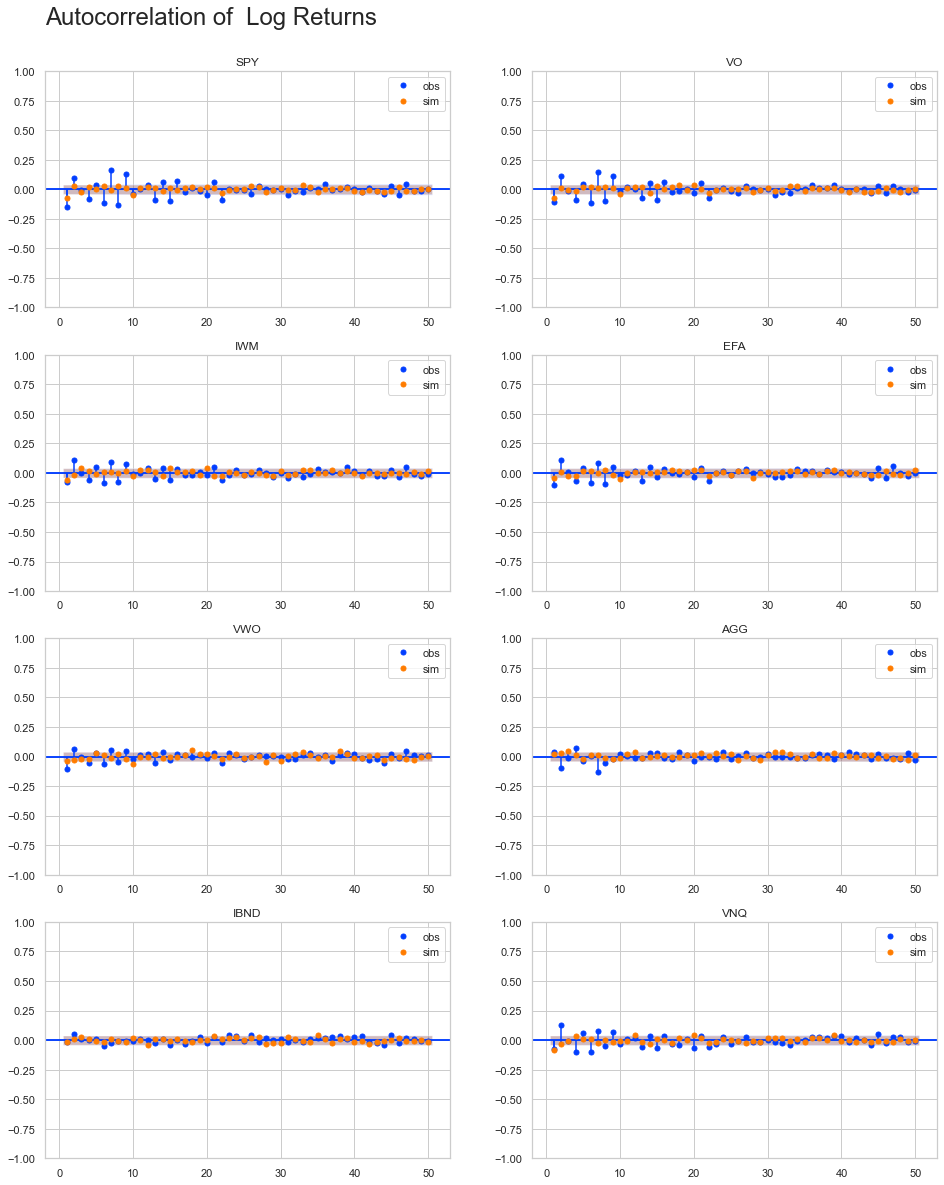

In [28]:
plot_autocorr_comparisons(norm, sims[2])

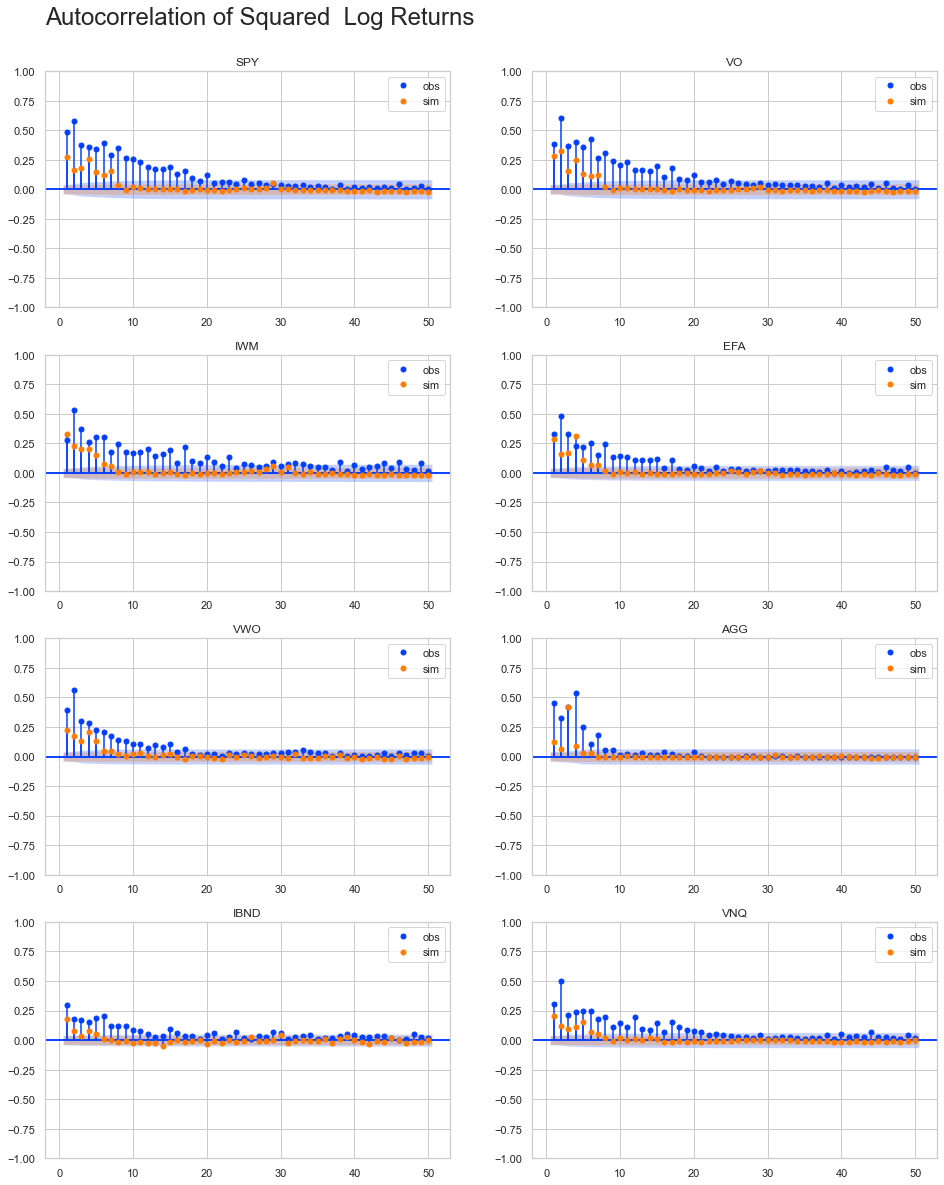

In [29]:
plot_autocorr_comparisons(norm, sims[2], square=True)

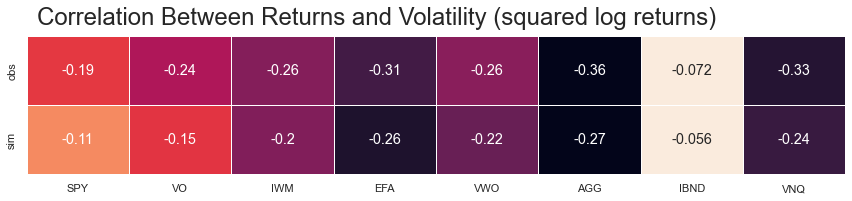

In [30]:
return_to_volatility_correlation(norm, sims[2])

---
## Simulation 4
---

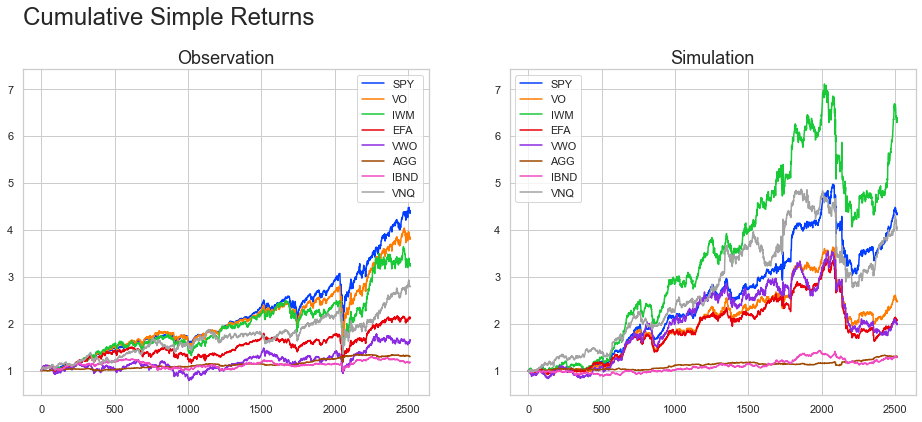

In [31]:
plot_path_comparison(norm, sims[3])

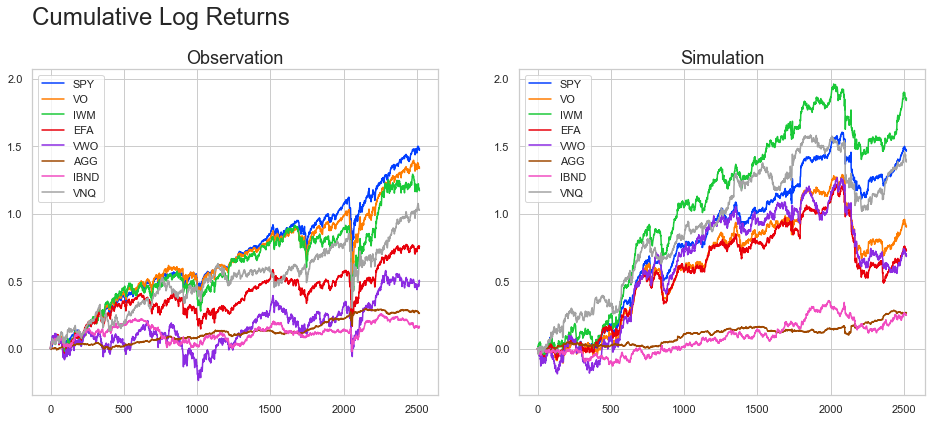

In [32]:
plot_path_comparison(norm, sims[3], log=True)

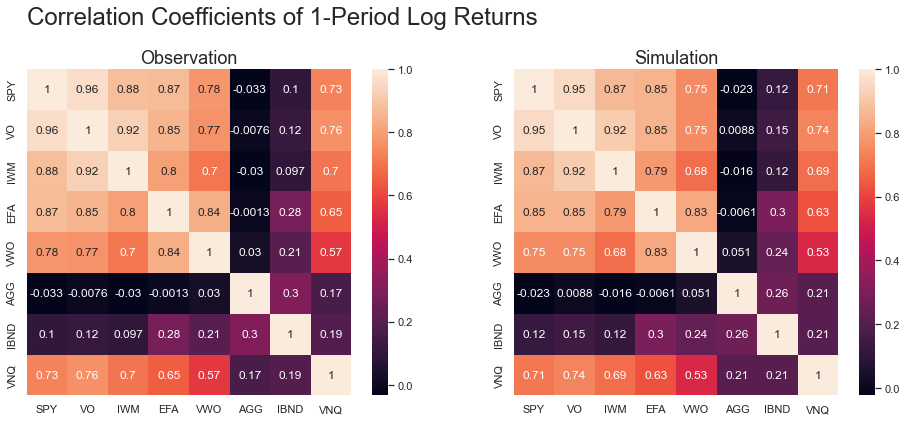

In [33]:
plot_corr_comparison(norm, sims[3])

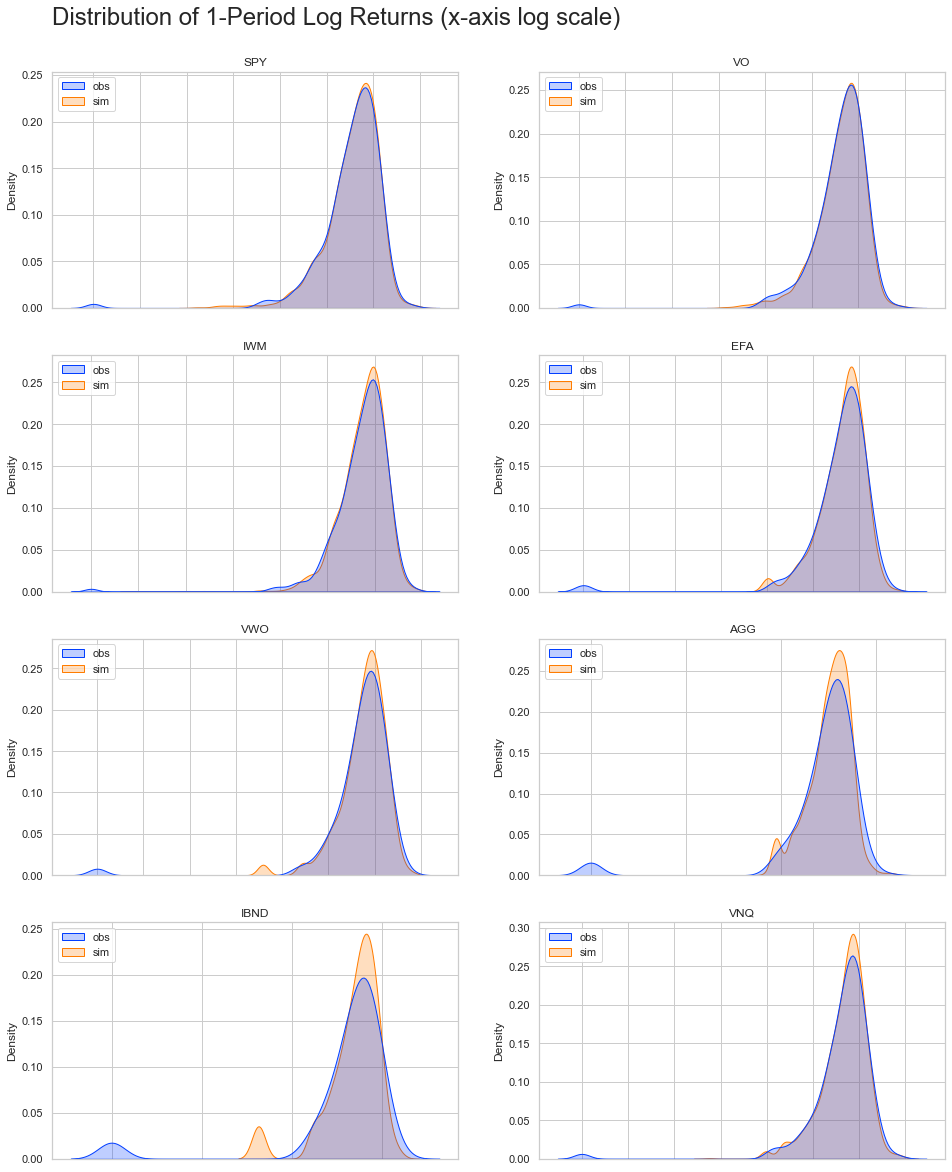

In [34]:
plot_distribution_comparisons(norm, sims[3])

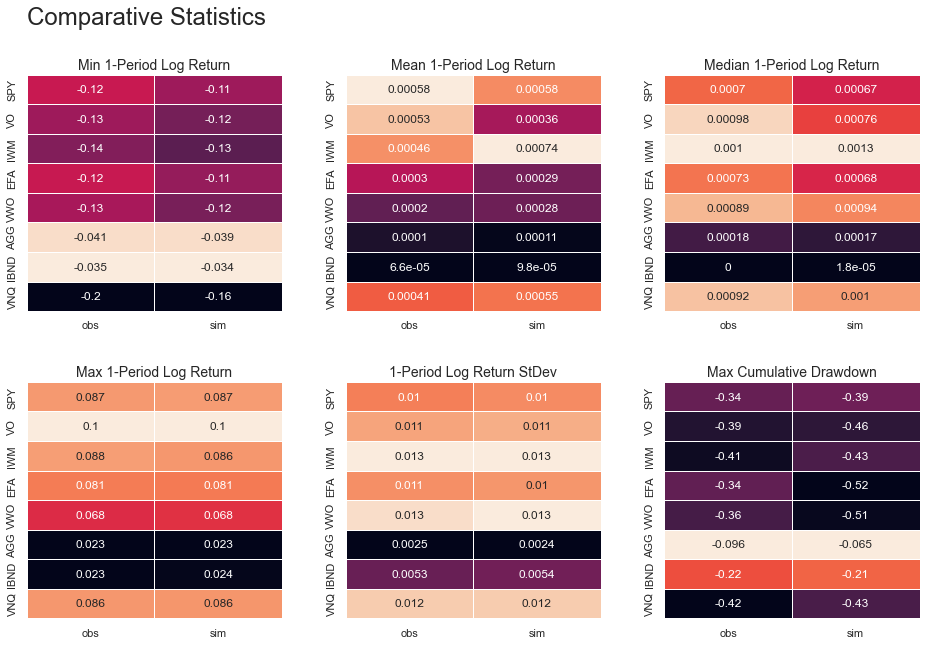

In [35]:
compare_statistics(norm, sims[3])

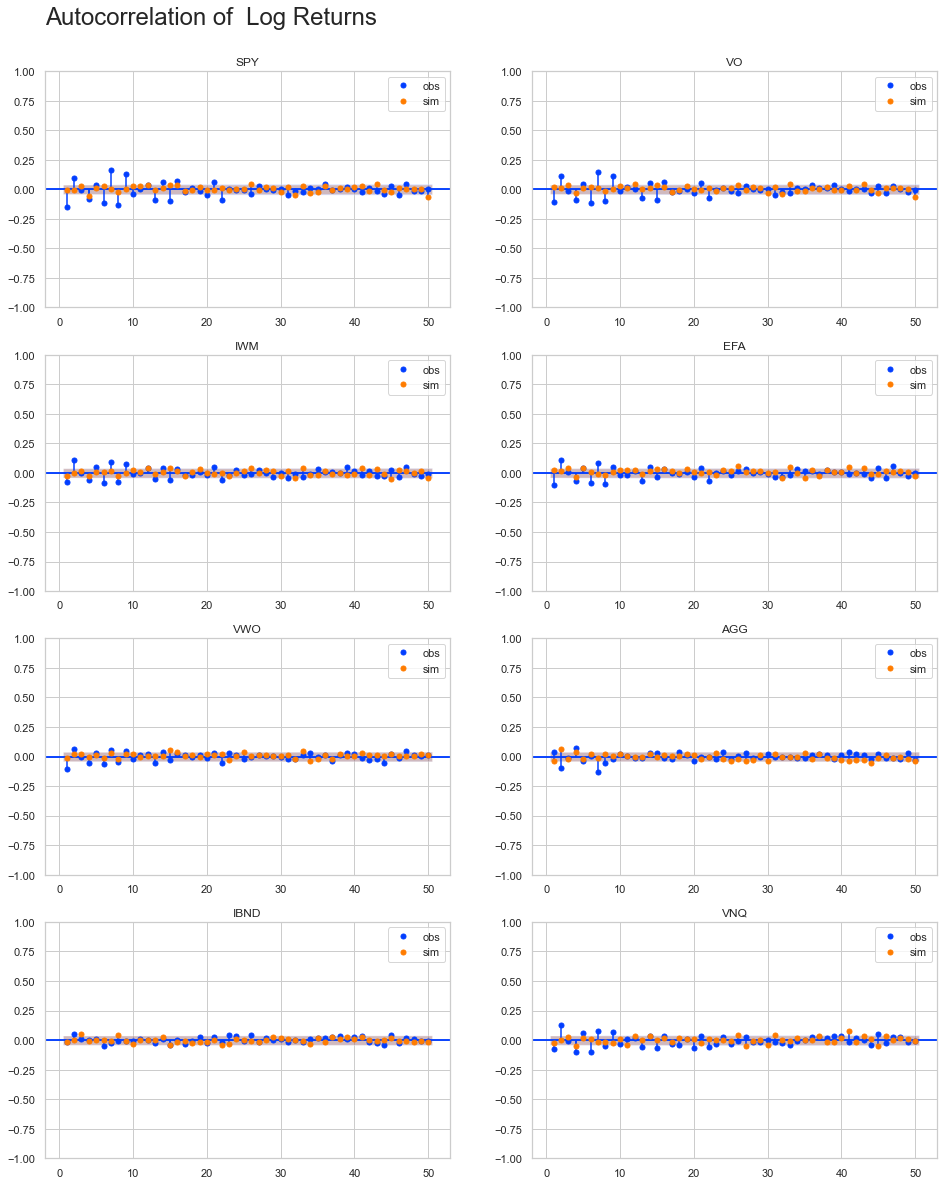

In [36]:
plot_autocorr_comparisons(norm, sims[3])

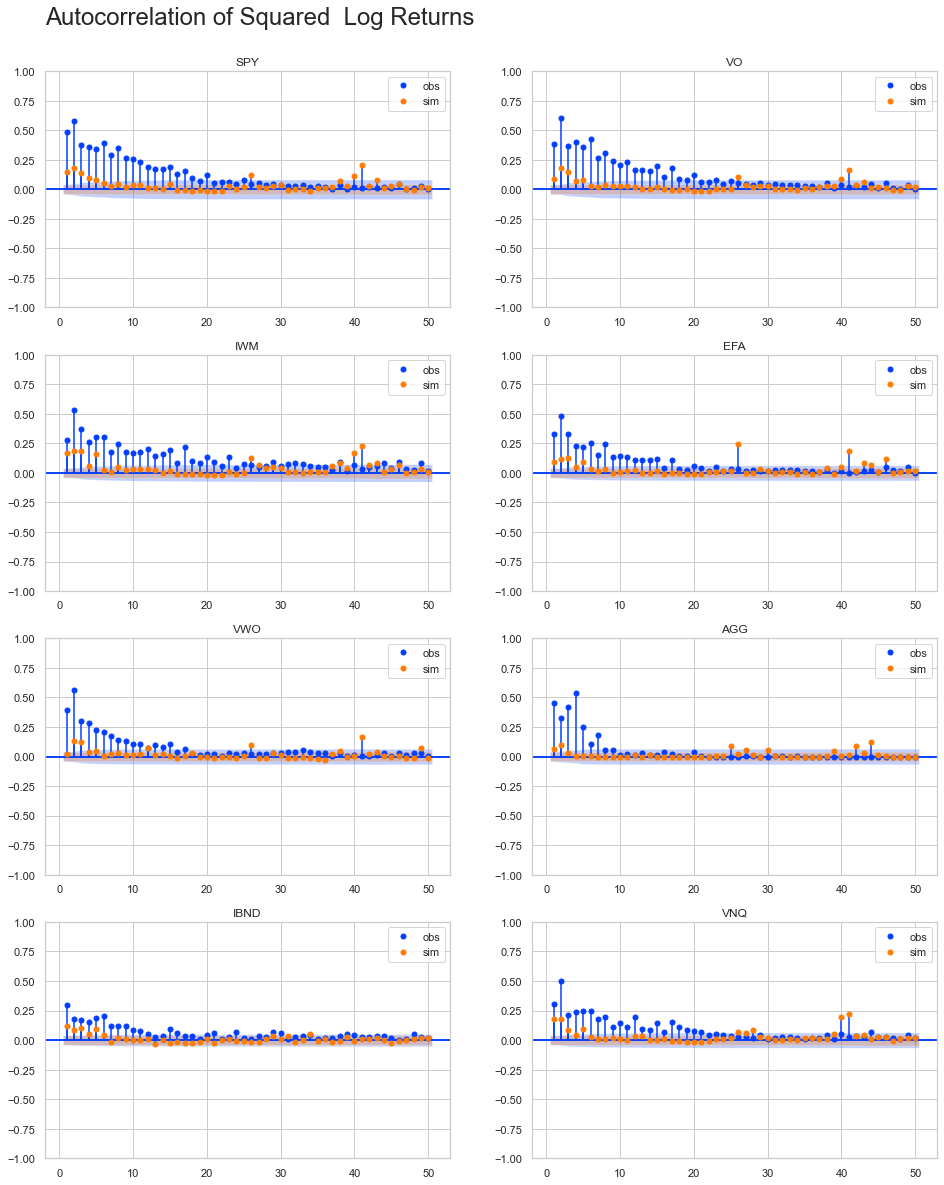

In [37]:
plot_autocorr_comparisons(norm, sims[3], square=True)

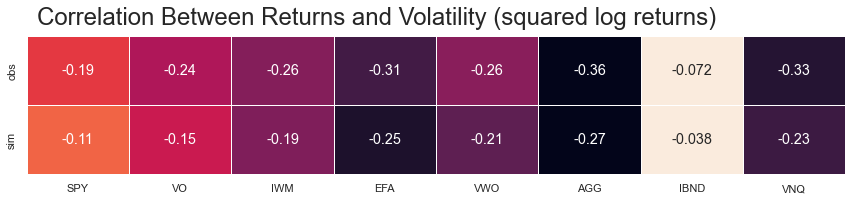

In [38]:
return_to_volatility_correlation(norm, sims[3])

---
## Simulation 5
---

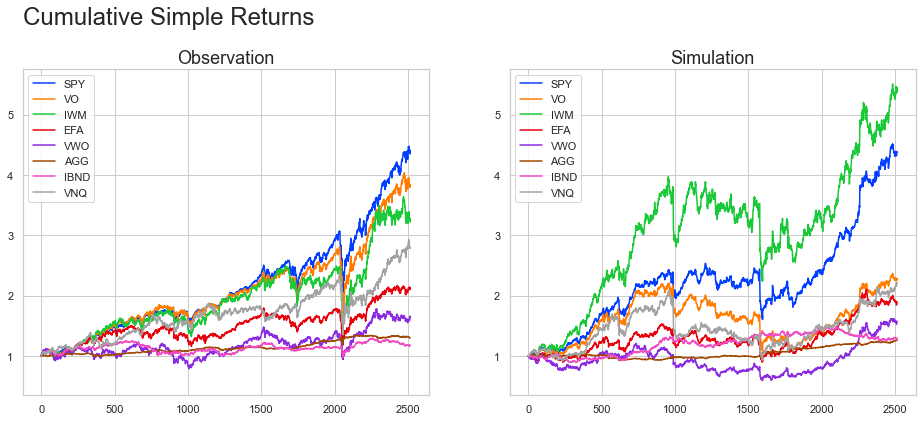

In [39]:
plot_path_comparison(norm, sims[4])

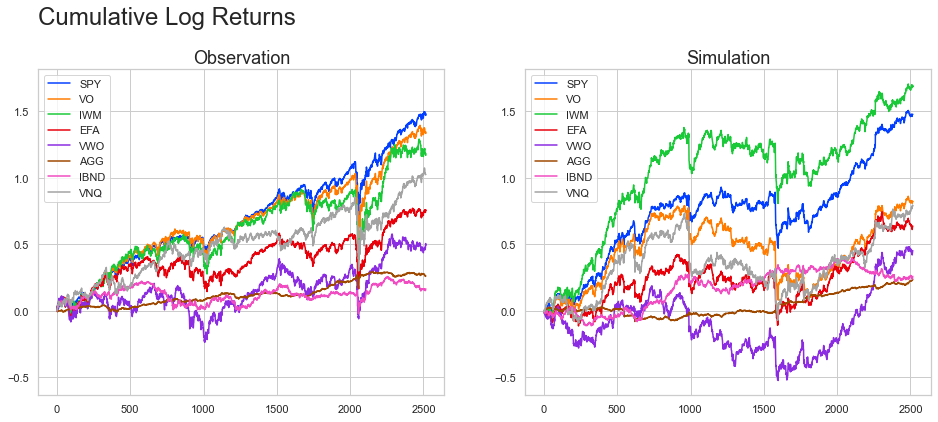

In [40]:
plot_path_comparison(norm, sims[4], log=True)

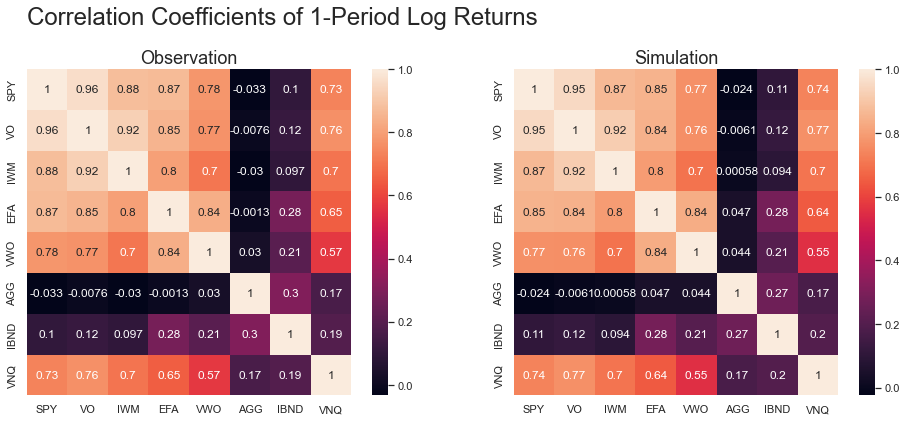

In [41]:
plot_corr_comparison(norm, sims[4])

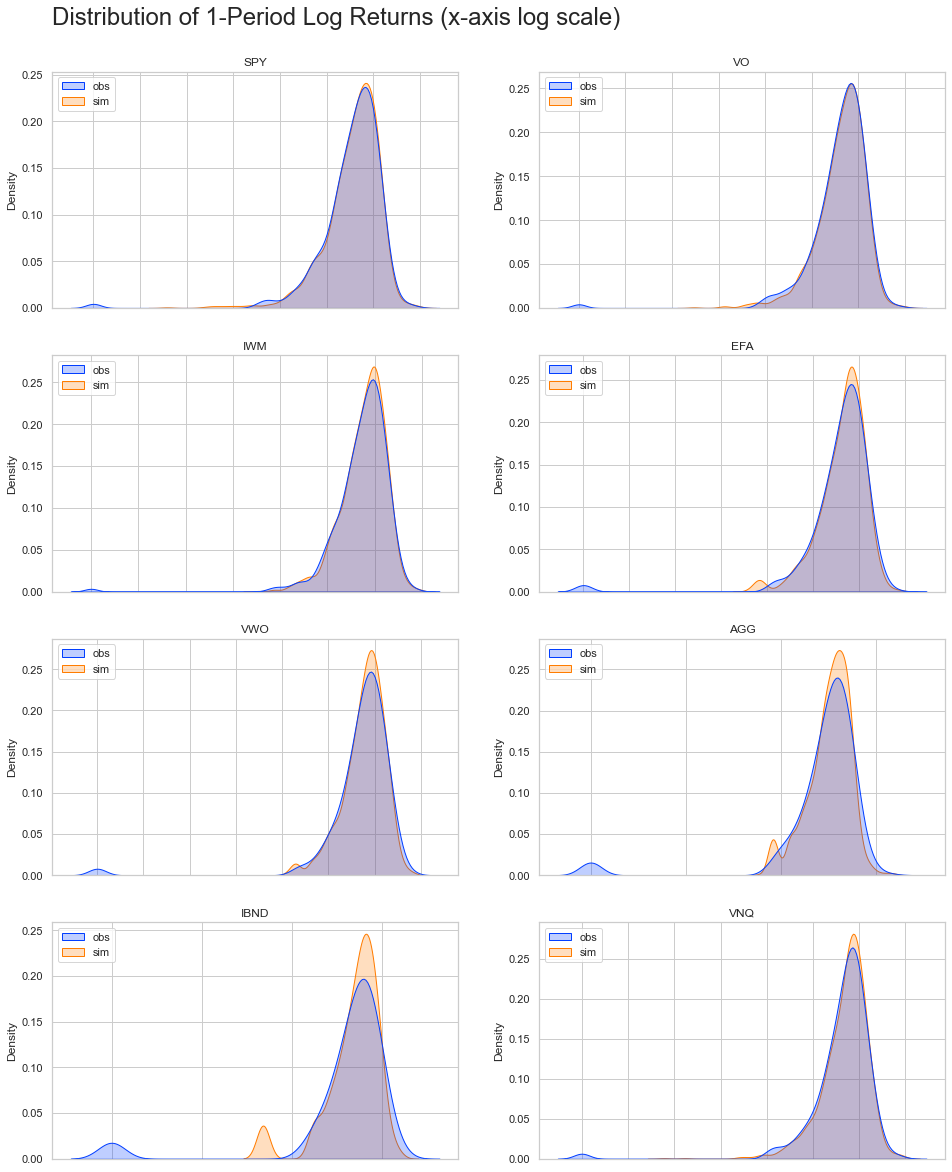

In [42]:
plot_distribution_comparisons(norm, sims[4])

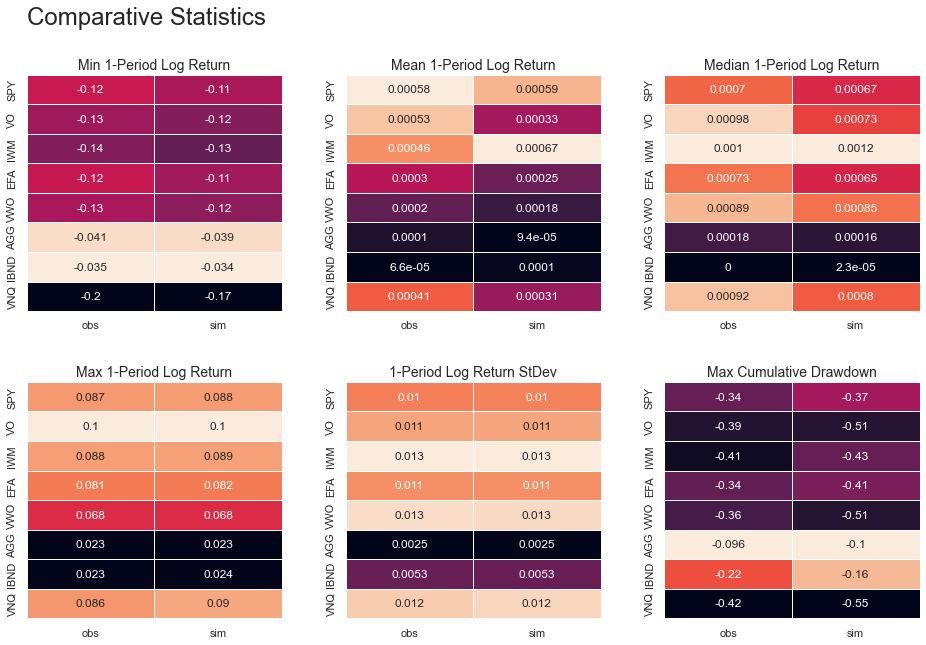

In [43]:
compare_statistics(norm, sims[4])

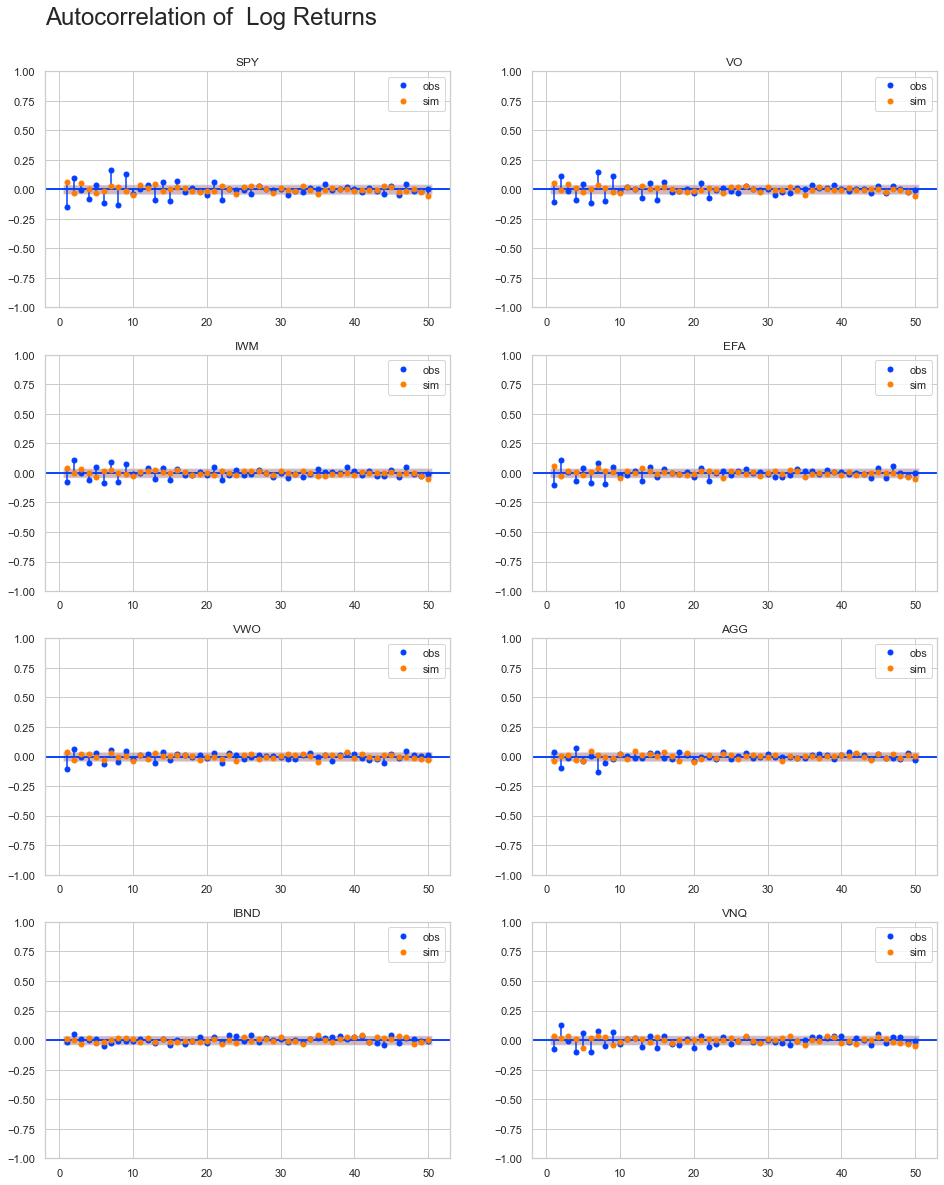

In [44]:
plot_autocorr_comparisons(norm, sims[4])

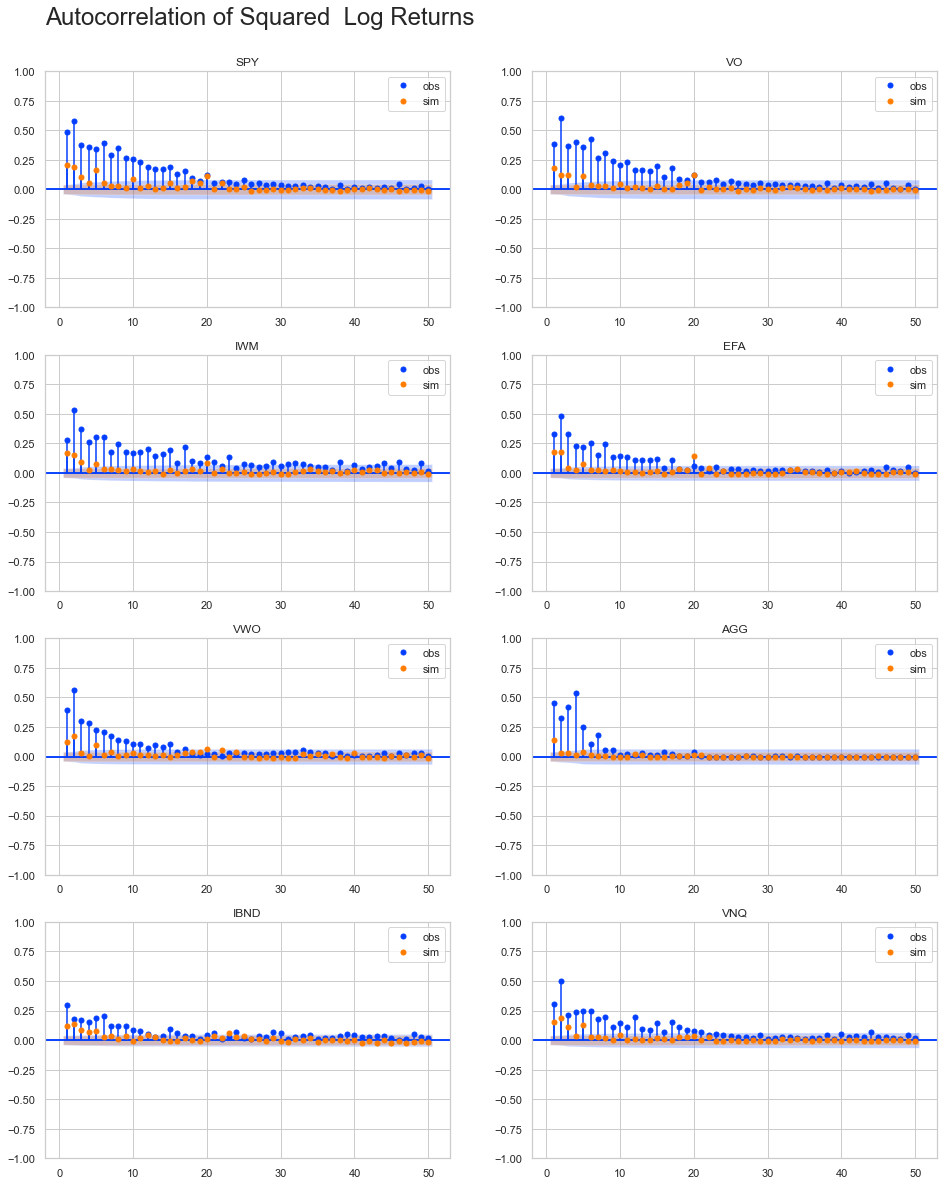

In [45]:
plot_autocorr_comparisons(norm, sims[4], square=True)

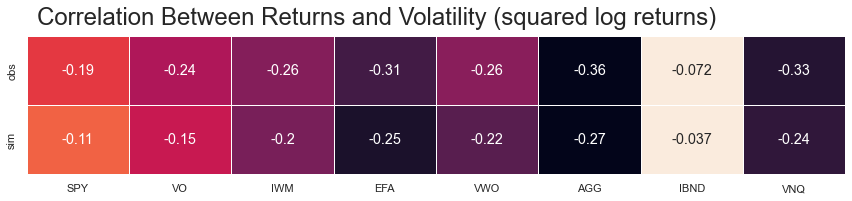

In [46]:
return_to_volatility_correlation(norm, sims[4])